In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file (update the file path as needed)
file_path = r"C:\Users\kezin\OneDrive\Documents\Accubits\Programs\multi\4sensor\peaks\test_3_02_25.csv"
# file_path = r"C:\Users\kezin\OneDrive\Documents\Accubits\Programs\multi\4sensor\peaks\test_final.csv"

# Try different encodings in case of issues
try:
    df = pd.read_csv(file_path, encoding="ISO-8859-1")
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding="latin1")

# Display basic info
print(df.info())

# Drop empty sensor columns (Sensor 6 and Sensor 7)
valid_sensors = df.columns[7:9]  # Assuming first column is "Time"

# Extract time column
time = df["Time"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              3586 non-null   int64  
 1   Temperature (°C)  3586 non-null   float64
 2   Humidity (%)      3586 non-null   float64
 3   Sensor 0 (V)      3586 non-null   float64
 4   Sensor 1 (V)      3586 non-null   float64
 5   Sensor 2 (V)      3586 non-null   float64
 6   Sensor 3 (V)      3586 non-null   float64
 7   Sensor 4 (V)      3586 non-null   float64
 8   Sensor 5 (V)      3586 non-null   float64
 9   Sensor 6 (V)      0 non-null      float64
 10  Sensor 7 (V)      0 non-null      float64
dtypes: float64(10), int64(1)
memory usage: 308.3 KB
None


Sensor: Sensor 4 (V)
Peak 1:
  - Max Value: 1.06552
  - Min Value: 1.02862
  - R%: 3.59%
Peak 2:
  - Max Value: 0.98198
  - Min Value: 0.97092
  - R%: 1.14%
Peak 3:
  - Max Value: 0.93410
  - Min Value: 0.91722
  - R%: 1.84%
Peak 4:
  - Max Value: 0.87083
  - Min Value: 0.85681
  - R%: 1.64%
Peak 5:
  - Max Value: 0.82161
  - Min Value: 0.80662
  - R%: 1.86%


Sensor: Sensor 5 (V)
Peak 1:
  - Max Value: 1.27799
  - Min Value: 1.26126
  - R%: 1.33%
Peak 2:
  - Max Value: 1.13577
  - Min Value: 1.12454
  - R%: 1.00%
Peak 3:
  - Max Value: 1.07292
  - Min Value: 1.04984
  - R%: 2.20%
Peak 4:
  - Max Value: 0.98934
  - Min Value: 0.97056
  - R%: 1.93%
Peak 5:
  - Max Value: 0.92638
  - Min Value: 0.90834
  - R%: 1.99%




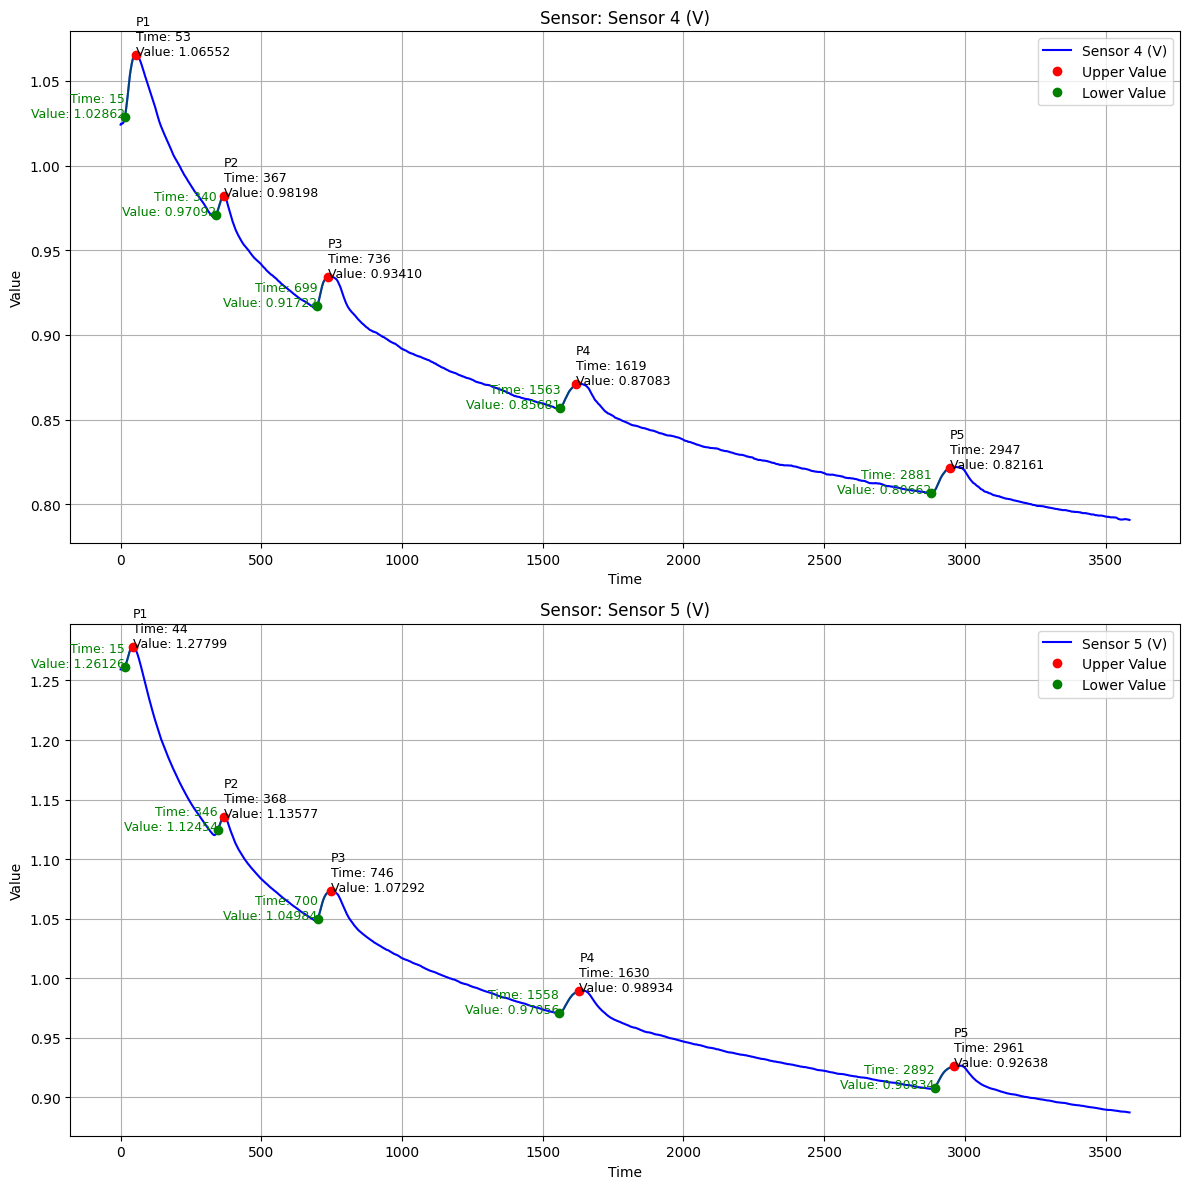

In [3]:
# Create subplots for each sensor
plt.figure(figsize=(12, 12))

for i, sensor in enumerate(valid_sensors):
    data = df[sensor]
    
    increasing_segments = []
    segment_indices = []
    
    min_window_size = 15  # Minimum window size
    max_window_size = 100  # Maximum window size
    
    j = 0
    while j < len(data) - min_window_size:
        window_size = min_window_size
        while j + window_size < len(data) and window_size <= max_window_size:
            window = data[j:j + window_size]
            if np.all(np.diff(window) > 0):
                window_size += 1
            else:
                break
        if window_size > min_window_size:
            increasing_segments.append(data[j:j + window_size])
            segment_indices.append((j, j + window_size))
        j += window_size  # Move to the next window
    
    upper_values = [max(segment) for segment in increasing_segments]
    lower_values = [min(segment) for segment in increasing_segments]

    # Print detected values for the current sensor
    print(f"Sensor: {sensor}")
    for idx, (upper, lower) in enumerate(zip(upper_values, lower_values)):
        # Calculate R%
        R_percent = ((upper - lower) / lower) * 100
        
        print(f"Peak {idx + 1}:")
        print(f"  - Max Value: {upper:.5f}")
        print(f"  - Min Value: {lower:.5f}")
        print(f"  - R%: {R_percent:.2f}%")
    print("\n")  # Add a newline for better readability

    # Plot original data and mark upper and lower values of increasing segments
    plt.subplot(len(valid_sensors), 1, i + 1)
    plt.plot(time, data, label=sensor, color='blue')
    
    for idx, (indices, segment, upper, lower) in enumerate(zip(segment_indices, increasing_segments, upper_values, lower_values)):
        start, end = indices
        plt.plot(time.iloc[start:end], segment, "g", alpha=0.5)  # Highlight increasing segment
        
        upper_idx = np.argmax(segment)
        lower_idx = np.argmin(segment)
        
        upper_time = time.iloc[start + upper_idx]
        lower_time = time.iloc[start + lower_idx]
        
        peak_label = f'P{idx+1}'  # Peak label (e.g., P1, P2, P3, ...)
        
        plt.plot(upper_time, upper, "ro", label="Upper Value" if idx == 0 else "")  # Mark upper value
        plt.plot(lower_time, lower, "go", label="Lower Value" if idx == 0 else "")  # Mark lower value
        
        plt.text(upper_time, upper, f'{peak_label}\nTime: {upper_time}\nValue: {upper:.5f}', fontsize=9, ha='left', color='black')
        plt.text(lower_time, lower, f'Time: {lower_time}\nValue: {lower:.5f}', fontsize=9, ha='right', color='green')

    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title(f"Sensor: {sensor}")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()